<a href="https://colab.research.google.com/github/CelebPeeps/Machine-learning/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset used in this project was found on kaggle https://www.kaggle.com/code/heeraldedhia/movie-ratings-and-recommendation-using-knn/data?select=tmdb_5000_movies.csv please dowload the movies.csv version as if you download the credits it will not work as intended and will give you an error I will also provide a download of the data set in the submission just in case and also upload it to google drive to make sure it will work and make sure you don't rename the document if you do the reading of the file will be incorrect



In [907]:
#I'm importing all the necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Reshape
from tensorflow import keras
import statistics as st
from sklearn.utils import resample
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from decimal import Decimal

In [908]:
#making the data frames for each dataset credits for the credit information and the movie data such as the rating and budget
# I also made a votes place to store movies['vote_average'] due to the fact that it makes it easier to type
movies = pd.read_csv('/content/drive/MyDrive/tmdb_5000_movies.csv')
votes = movies['vote_average']

In [909]:
#checking the info of the dataset I'll be using the most to check the data types and null values
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [910]:
#checking the shape of the movies 
movies.shape

(4803, 20)

In [911]:
movies.isnull().sum()
#I plan to remove the homepage column and the tagline column and then use imputation on release_data, runtime, and overview

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

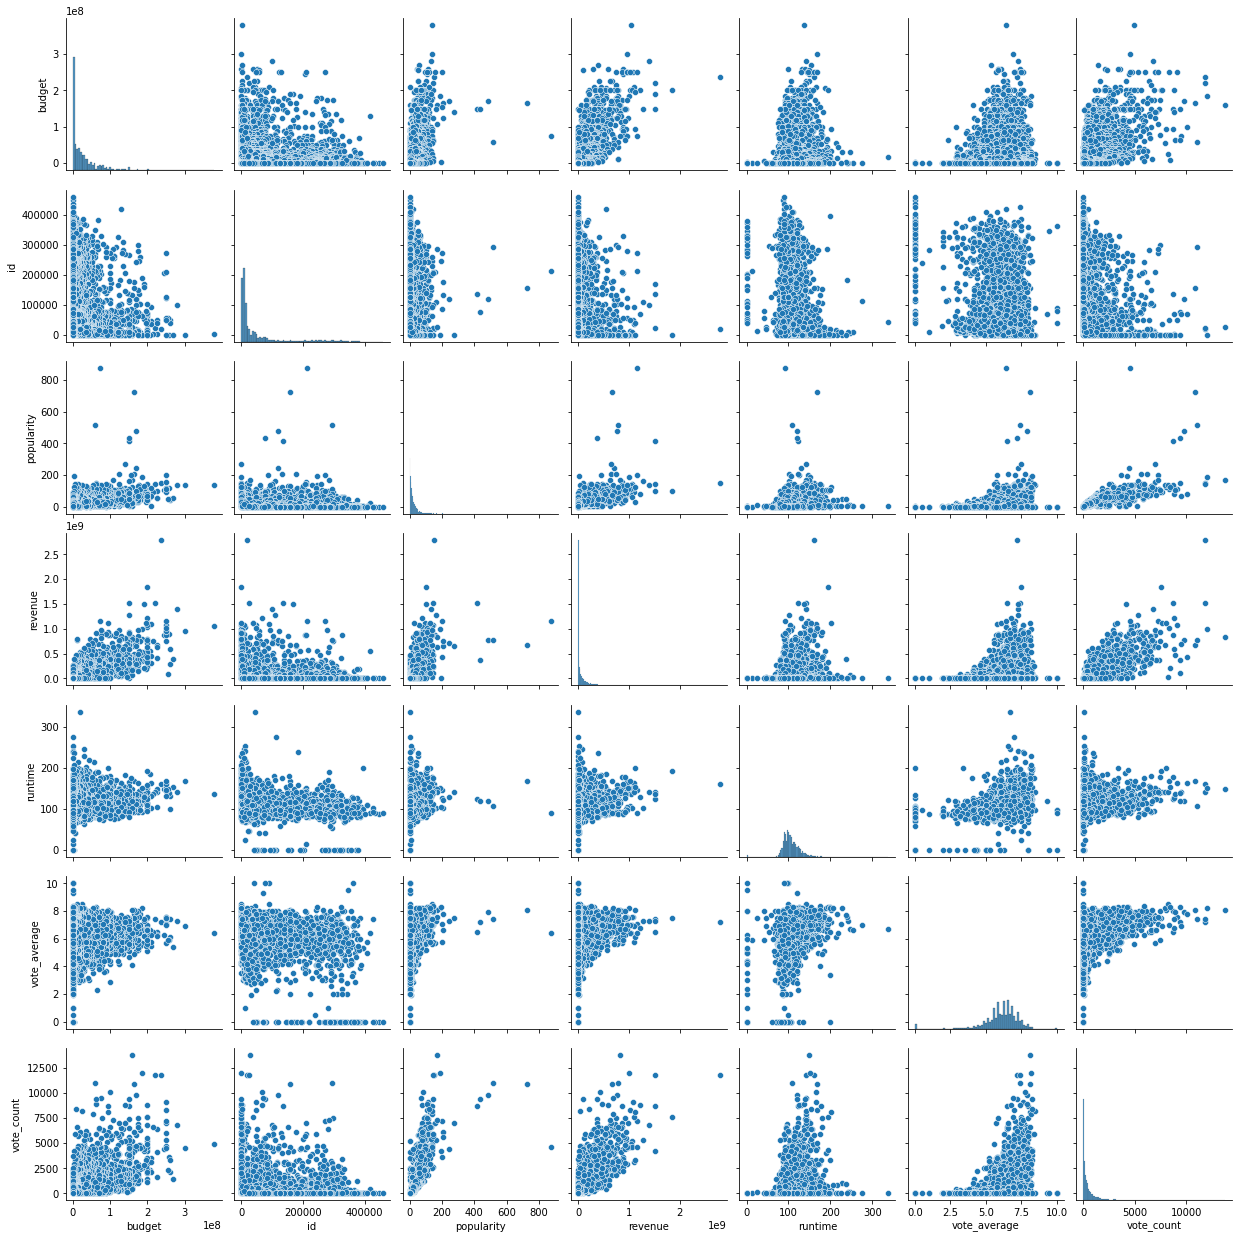

In [912]:
sns.pairplot(data = df)
#this shows the relationship and the relevance between the features

In [913]:
movies['runtime'] = movies['runtime'].fillna(movies['runtime'].mode()[0])
movies = movies.drop(['homepage', 'tagline', 'genres', 'keywords', 'original_title', 'original_language', 'overview', 'production_companies', 'production_countries', 'status', 'title', 'spoken_languages', 'release_date'], axis = 1)
movies.isnull().sum()
#this shows all the preprocessing steps I've taken to make this data be able to used in the of my model I've dropped the irrelvant columns, ones with strings that are irrelvant, and columns with too many null values and then filled in the values that had missing values

budget          0
id              0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
dtype: int64

In [914]:
movies['budget'].mean
#showing the mean of the budget and how it's pretty high actually around 200ish million

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4798       220000
4799         9000
4800            0
4801            0
4802            0
Name: budget, Length: 4803, dtype: int64>

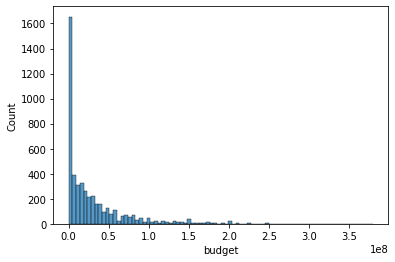

In [915]:
sns.histplot(x = "budget", data = df)
#This data is showing that most of the movies in this data set shows the budget is usually skewed to the low side and have the average 250 million which is intersting due to the fact that online it shows it's 100-150 million which shows this data may be on the high side considering the rating is so high while there are some outliers

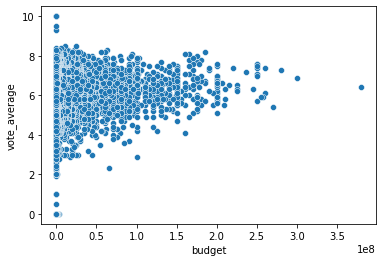

In [916]:
sns.scatterplot(x = "budget", y = "vote_average", data = df)
#looking at this chart it shows the relationship betweeen the votes/ratings on average and the budget and how they interact there is a postive relationship and I believe this is becasue the higher the budget the higher the production quality and the more people will enjoy it

In [917]:
movies_upsampled.info()
#this is to check the data types of each of the columns left 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 4562 to 3689
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4802 non-null   int64  
 1   id            4802 non-null   int64  
 2   popularity    4802 non-null   float64
 3   revenue       4802 non-null   int64  
 4   runtime       4802 non-null   float64
 5   vote_average  4802 non-null   float64
 6   vote_count    4802 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 300.1 KB


In [918]:
X = movies[['budget', 'popularity', 'revenue', 'runtime', 'vote_count', 'id']]
Y = round(movies['vote_average'])

#assigning both of my variables needed for my x_train, x_test, y_train, and y_test the Y will be the label with the vote average as the machine is trying to predict, and the X will be the features that will help predict it.

In [919]:
movies.info()
#this is an effort to check the data types to make sure they are all compatable with the format of decision tree making as my classifier as it cannot use strings/objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4803 non-null   int64  
 1   id            4803 non-null   int64  
 2   popularity    4803 non-null   float64
 3   revenue       4803 non-null   int64  
 4   runtime       4803 non-null   float64
 5   vote_average  4803 non-null   float64
 6   vote_count    4803 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 262.8 KB


In [920]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 42)
#this is the code I used to assign my X_train, X_test, Y_train, and Y_test I made sure that it was the standard format and it will be assigned normally

In [921]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)
#I used my code from above and assigned a variable clf to run the function of tree.DecisionTreeClassifer() and then used that cld variable to use fit the train of both X and Y 

DecisionTreeClassifier()

In [922]:
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, Y_test)
accuracy
#I assigned the variable pred the prediction of what it would it got from X_test and how they predicted it and then finally calculated the accuracy of the model using accuracy_score as a function and used the pred variable compared to the Y_test to check my accuracy and then I printed it out and I infer that this can be improved 

0.43600416233090533

In [923]:
confusion_matrix1 = confusion_matrix(pred, Y_test)
confusion_matrix1
#this is the code I used to make my confusion matrix and then I ran it and printed it out to check all the values it prints out this was a bit confusing at first to read until I got used to it after looking up these results format I infer this is because it has more than 2 classifier types for example true and false

array([[ 15,   0,   1,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   1,   6,   6,   1,   0,   0],
       [  0,   0,   0,   1,   3,  11,   9,   6,   1,   0],
       [  0,   0,   0,   2,  10,  29,  64,  26,   0,   0],
       [  0,   0,   0,   4,  13,  61, 232, 111,   7,   0],
       [  0,   1,   1,   0,   6,  19, 101, 113,  33,   0],
       [  0,   1,   0,   0,   1,   1,   7,  26,  27,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0,   0]])

In [924]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

pred = rfc.predict(X_test)
'''I looked back at old code and discovered this function randomforestclassifier and I was able to improve the accuracy after making the estimators 100 this is able to look deeper into the data and the objective of this is to improve the accuracy I infer from this that the accuracy will improve'''

'I looked back at old code and discovered this function randomforestclassifier and I was able to improve the accuracy after making the estimators 100 this is able to look deeper into the data and the objective of this is to improve the accuracy I infer from this that the accuracy will improve'

In [925]:
accuracy = accuracy_score(pred, Y_test)
accuracy
#my earlier assessment was correct and with the new function I used I was able to improve my accuracy score by quite a large margin of about 10% this was because of the random forestclassifer and I infered that this can be improved more outside of this project 

0.5265348595213319

In [926]:
confusion_matrix2 = confusion_matrix(pred, Y_test)
confusion_matrix2
#this is the second confusion matrix I made to check the differences and compare it between the first and the objective of this was to compare it the first considering the changes while I infered that there will be a big change and I infer that it is a bit more sporadic now

array([[ 15,   0,   1,   0,   1,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   1,   0,   0,   0,   0],
       [  0,   0,   0,   1,   1,   3,   3,   3,   1,   0],
       [  0,   0,   0,   1,  13,  21,  26,  12,   0,   0],
       [  0,   1,   1,   4,  19,  97, 315, 128,   6,   0],
       [  0,   0,   0,   1,   1,   5,  74, 128,  35,   0],
       [  0,   1,   0,   0,   0,   0,   1,  12,  26,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0,   0]])

In [927]:
import pickle
with open('model_pkl', 'wb') as files:
  pickle.dump(rfc, files)
'''I looked at my past project liver project and was able to find this piece of code that will import pickle and a files within it that can help save my model the objective is to save my model and I infer this will work out''' 

'I looked at my past project liver project and was able to find this piece of code that will import pickle and a files within it that can help save my model the objective is to save my model and I infer this will work out'

In [928]:
with open('model_pkl', 'rb') as f:
  lr = pickle.load(f)
'''this is assigning the loading of the pickle I imported from the last code to a variable and then the objective is to use this varaible in the next line of code and I infer that the model will be somewhat big''' 

'this is assigning the loading of the pickle I imported from the last code to a variable and then the objective is to use this varaible in the next line of code and I infer that the model will be somewhat big'

In [929]:
new_saved_model = lr.predict(X_test)
'''this is assigning a variable again from my past opperation to final print it the objective is to final print this variable but not in the same line of code I infer that the printing of the model will run smoothly and since the data is quite large it might take awhile'''

'this is assigning a variable again from my past opperation to final print it the objective is to final print this variable but not in the same line of code I infer that the printing of the model will run smoothly and since the data is quite large it might take awhile'

In [930]:
print(new_saved_model)
#this is printing the model I've assigned to the variable newsavedmodel and this is the result of all the coding of this project my objective was to print out this code to observe it and I infer that this will help me improve the code later on if needed

[ 6.  6.  6.  7.  8.  6.  7.  6.  5.  6.  6.  6.  7.  8.  6.  6.  6.  6.
  6.  6.  7.  6.  6.  7.  7.  6.  6.  5.  6.  6.  6.  7.  8.  7.  6.  8.
  6.  6.  6.  6.  6.  8.  7.  6.  7.  6.  7.  7.  6.  5.  6.  6.  6.  6.
  5.  5.  7.  6.  4.  7.  5.  6.  8.  7.  6.  6.  6.  6.  4.  7.  6.  6.
  7.  6.  6.  0.  6.  6.  5.  7.  6.  6.  6.  6.  6.  6.  6.  5.  6.  6.
  6.  7.  7.  8.  6.  8.  5.  7.  6.  7.  6.  6.  5.  8.  5.  6.  6.  0.
  8.  6.  7.  6.  7.  6.  0.  7.  6.  6.  6.  6.  6.  6.  6.  6.  5.  7.
  6.  7.  7.  6.  5.  5.  6.  6.  6.  5.  7.  6.  6. 10.  6.  6.  6.  8.
  8.  6.  6.  6.  6.  7.  6.  6.  7.  6.  7.  7.  6.  7.  6.  7.  6.  6.
  7.  6.  6.  7.  7.  6.  6.  7.  6.  6.  7.  7.  6.  7.  6.  6.  6.  7.
  6.  6.  7.  6.  6.  6.  5.  7.  6.  6.  6.  6.  6.  6.  6.  6.  6.  8.
  6.  7.  6.  7.  5.  5.  7.  6.  7.  7.  6.  6.  6.  7.  7.  6.  6.  8.
  6.  5.  7.  6.  6.  6.  7.  5.  6.  6.  7.  6.  0.  7.  6.  6.  7.  7.
  6.  7.  6.  6.  7.  7.  7.  8.  5.  6.  7.  7.  6

I believe overall this project went smoothly but due to some draw back at the begining after changing data sets I was able to get back on my feet and finish this code while I still believe there can be improvements I believe this is a good project of mine that I coded and I'm proud of it and I've writting observations about the objective and infered after each line of code which was tedious but I believe this code and project has everything asked for